# Генерация цвета

Этот код помогает создать дискретную цветовую гамму для визуализаций с использованием библиотек matplotlib, seaborn и plotly. За основу можно использовать корпоративные цвета или шаблоны палитр из открытых источников, таких как [Color Hunt](https://colorhunt.co/).


In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import warnings
#отключаем предупреждения
warnings.filterwarnings('ignore')

In [2]:
#функция для создания датасета с заданным количеством цветов
def create_dataframe(n_colors):
    return pd.DataFrame({'index': np.arange(n_colors), 'col': np.ones(n_colors)})
#функция для генерации палитры
def generate_palette(colors, n_colors):
    cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors, N=n_colors)
    return [mcolors.to_hex(cmap(i)) for i in range(cmap.N)]
#функция для визуализации цветовой палитры
def color_range(df, palette, figsize=(12, 2)):
    plt.figure(figsize=figsize)
    sns.barplot(x=df['index'], y=df['col'], palette=palette)
    plt.ylabel('')
    plt.xlabel('Индекс цвета в палитре', fontsize=10)
    plt.tight_layout()
    plt.show()

В качестве примера будем использовать [эту палитру](https://colorhunt.co/palette/fcf9edffba5aff7657665c84). Мы исключим первый цвет из неё, оставив три оттенка:

- FFBA5A
- FF7657
- 665C84

Чтобы создать плавный переход между цветами, можно выбрать один и тот же оттенок для первого и последнего цвета. Чем больше цветов будет указано, тем более мягким станет переход между ними, а также появится больше возможностей для выбора подходящих вариантов.

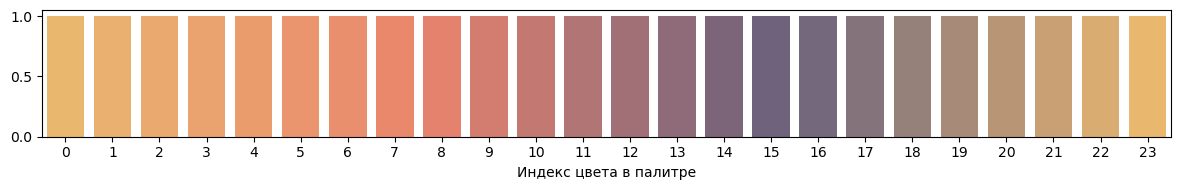

In [3]:
#задаём количество цветов
n_colors = 24
#создаём датасет
df = create_dataframe(n_colors)
#указываем опорные цвета
colors = ['#FFBA5A', '#FF7657', '#665C84', '#FFBA5A']
palette = generate_palette(colors, n_colors)

#визуализируем палитру
sns.set_palette(palette)
color_range(df, palette)

В сложных графиках порой бывает сложно определить нужный оттенок. Чтобы упростить задачу, можно исключить некоторые сгенерированные цвета из палитры. Например, можно оставить в палитре каждый третий цвет.

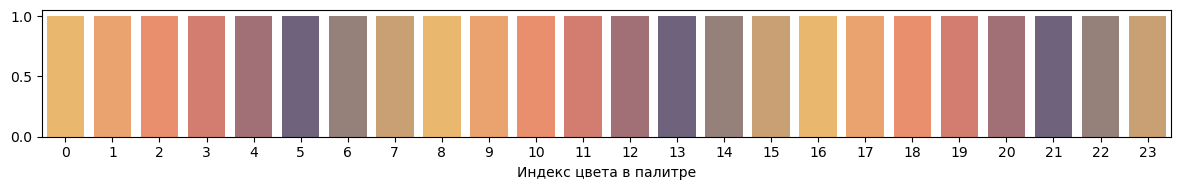

In [4]:
#сохраняем каждый третий цвет
simplified_palette = palette[::3]  
sns.set_palette(simplified_palette)
color_range(df, simplified_palette)

Таким образом, из 24 сгенерированных цветов, основанных на трех исходных оттенках, мы получили палитру, состоящую из восьми тщательно подобранных позиций. Если график предполагает использование конкретного цвета, подписи по оси X позволят быстро определить индекс цвета для дальнейших настроек.